In [6]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score  
df = pd.read_excel('ProjectData2024.xlsx')
df.info()
df.head(), df.tail(20)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vs      1187 non-null   float64
 1   DEN     1185 non-null   float64
 2   NEU     1184 non-null   float64
 3   Vp      1182 non-null   float64
dtypes: float64(4)
memory usage: 37.5 KB


(         Vs     DEN     NEU        Vp
 0  1.676857  2.3767  0.2759  3.045533
 1  1.677172  2.2101  0.2524  2.974779
 2  1.676252  2.1419  0.2591  2.881411
 3  1.677030  2.1660  0.2589  2.930981
 4  1.684534  2.1193  0.2596  2.910094,
             Vs     DEN     NEU        Vp
 1175  1.830254  2.4994  0.1639  3.795903
 1176       NaN  2.4727  0.1738  3.786439
 1177       NaN  2.5265  0.1747  3.813609
 1178       NaN  2.4992  0.1765  3.723357
 1179  1.783920  2.4869  0.1765  3.706401
 1180  1.722414  2.5298  0.1772  3.587773
 1181  1.701131     NaN  0.1701  3.589332
 1182  1.698956     NaN  0.1760  3.642491
 1183  1.765315     NaN  0.1715  3.694317
 1184  1.769975     NaN  0.1683  3.793243
 1185  1.796977  2.4993  0.1504  3.866460
 1186  1.787030  2.4953  0.1464  3.920207
 1187  1.781640  2.5650  0.1395       NaN
 1188  1.773772  2.5043  0.1498       NaN
 1189  1.723615  2.5082  0.1579       NaN
 1190  1.710900  2.5386  0.1686       NaN
 1191  1.730096  2.5394  0.1721  3.807987
 1192  1.

In [7]:
df.replace(0, np.nan, inplace=True)
df.replace('', np.nan,inplace=True)
df.info()
df.head(), df.tail(20)

df.dropna(inplace=True)
miss_data= df.isnull().sum()
print(miss_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vs      1187 non-null   float64
 1   DEN     1185 non-null   float64
 2   NEU     1184 non-null   float64
 3   Vp      1182 non-null   float64
dtypes: float64(4)
memory usage: 37.5 KB
Vs     0
DEN    0
NEU    0
Vp     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1164 entries, 0 to 1192
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vs      1164 non-null   float64
 1   DEN     1164 non-null   float64
 2   NEU     1164 non-null   float64
 3   Vp      1164 non-null   float64
dtypes: float64(4)
memory usage: 45.5 KB


In [8]:
dups= df.duplicated()
print(dups.any())
print(df[dups])


True
            Vs     DEN     NEU        Vp
1106  1.056314  2.3807  0.3371  2.588172
1107  1.053382  2.3766  0.3452  2.619560
1108  1.066399  2.3660  0.3426  2.626140
1109  1.064992  2.3538  0.3670  2.613025
1110  1.046916  2.3505  0.3509  2.597221
1111  1.033467  2.3533  0.3523  2.581377
1112  1.046970  2.3535  0.3317  2.590031
1113  1.029629  2.3574  0.3455  2.630902
1124  1.072748  2.3358  0.3216  2.584707
1129  1.211407  2.3670  0.3000  2.766731
1132  1.106032  2.3645  0.3233  2.633402
1133  1.072748  2.3358  0.3216  2.584707
1134  1.066803  2.3268  0.3452  2.571996
1135  1.066234  2.3441  0.3472  2.575603
1136  1.056314  2.3807  0.3371  2.588172
1137  1.053382  2.3766  0.3452  2.619560
1138  1.066399  2.3660  0.3426  2.626140
1139  1.064992  2.3538  0.3670  2.613025
1140  1.932877  2.5244  0.1774  3.839216
1141  1.896222  2.5230  0.1629  3.835414
1142  1.765182  2.5164  0.1566  3.728062
1143  1.769825  2.5001  0.1582  3.707501
1144  1.757684  2.5273  0.1603  3.722712
1145  1.797

In [9]:
df.drop_duplicates(inplace = True)

dups2= df.duplicated()
print(dups2.any())

df.info()

False
<class 'pandas.core.frame.DataFrame'>
Index: 1106 entries, 0 to 1131
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vs      1106 non-null   float64
 1   DEN     1106 non-null   float64
 2   NEU     1106 non-null   float64
 3   Vp      1106 non-null   float64
dtypes: float64(4)
memory usage: 43.2 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x248e35c6fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x248e35c7250>,
 'boxes': [<matplotlib.lines.Line2D at 0x248e35c6e90>,
 'medians': [<matplotlib.lines.Line2D at 0x248e35c74d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x248e35c7610>,
 'means': []}

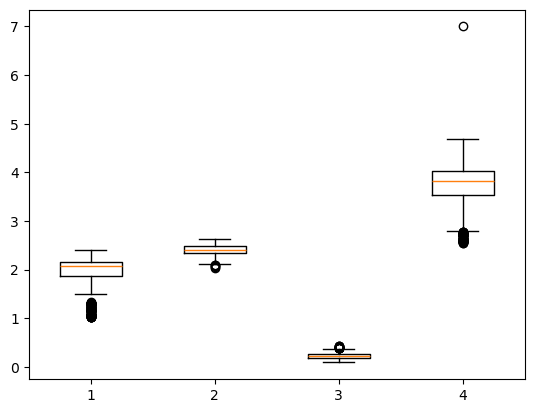

In [10]:
df.shape
plt.boxplot(df,widths=0.5)

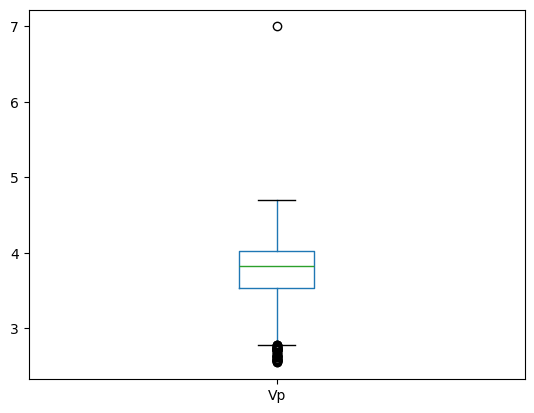

In [11]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df, "Vp")

New shape (1024, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 1024 entries, 0 to 1042
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vs      1024 non-null   float64
 1   DEN     1024 non-null   float64
 2   NEU     1024 non-null   float64
 3   Vp      1024 non-null   float64
dtypes: float64(4)
memory usage: 40.0 KB


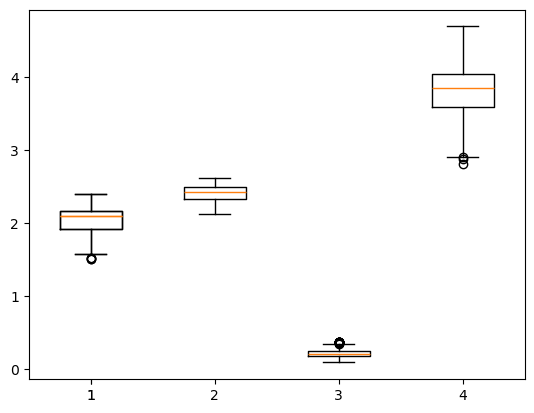

In [12]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    UB = Q3 + 1.5*IQR
    LB = Q1-1.5*IQR
    ls = df.index[ (df[ft] < LB) | (df[ft] > UB)]
    return ls

index_list = []
for f in ['Vs', 'DEN', 'NEU', 'Vp']:
    index_list.extend(outliers(df, f))

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

df_cleaned = remove(df, index_list)
#outliers = [x for x in df['Vs'] if x < Q1 or x > Q3]
#print('identified outliers : %d' %len(outliers))


#U_array = np.where(df['Vs']>= UB)[0]
#L_array = np.where(df['Vs']<= LB)[0]
#print(U_array, L_array)
#df[(df['Vs']< LB) & (df['Vs']>UB)]
#df1 = df[df['Vs'] > LB]
#df.drop(index=U_array, inplace=True)
#df.drop(index=L_array, inplace=True)
print("New shape", df_cleaned.shape)
plt.boxplot(df_cleaned['Vs'], widths=0.5)
df_cleaned.info()
plt.boxplot(df_cleaned,widths=0.5)
df_cleaned.to_excel('CleanOutlier1.xlsx', index=False)

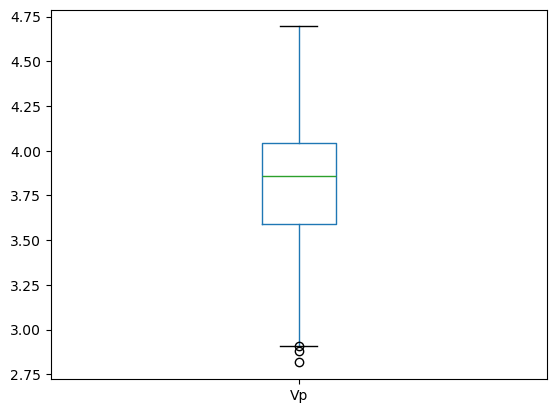

In [13]:
plot_boxplot(df_cleaned, "Vp")



         Vs     DEN     NEU        Vp
0  1.676857  2.3767  0.2759  3.045533
1  1.677172  2.2101  0.2524  2.974779
2  1.676252  2.1419  0.2591  2.881411
3  1.677030  2.1660  0.2589  2.930981
4  1.684534  2.1193  0.2596  2.910094


,Vs,DEN,NEU,Vp
Vs,1.000000,0.469904,-0.550656,0.827545
DEN,0.469904,1.000000,-0.940704,0.839817
NEU,-0.550656,-0.940704,1.000000,-0.867323
Vp,0.827545,0.839817,-0.867323,1.000000


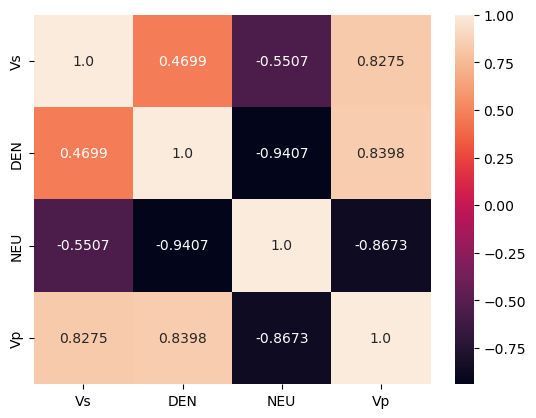

In [14]:
 
df2 = pd.read_excel('CleanOutlier1.xlsx').astype(float)
print(df2.head()) 
sns.heatmap(df2.corr(), annot = True, fmt= '0.4')
CorrelationData=df2.corr()

CorrelationData

In [15]:
CorrelationData['Vs'][abs(CorrelationData['Vs']) > 0.5]
Data_forML = df2.drop(['NEU'], axis=1)

Data_forML.info()
Data_forML.to_excel('FinalCleanedSelected.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vs      1024 non-null   float64
 1   DEN     1024 non-null   float64
 2   Vp      1024 non-null   float64
dtypes: float64(3)
memory usage: 24.1 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1024 non-null   int64  
 1   Vs          1024 non-null   float64
 2   DEN         1024 non-null   float64
 3   Vp          1024 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 32.1 KB


(0.0, 5.0)

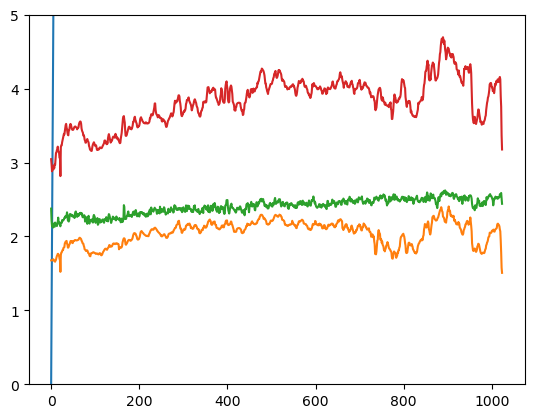

In [16]:
df3 = pd.read_excel('FinalCleanedSelected.xlsx')
df3.info()
plt.plot(df3)
plt.ylim(0,5)


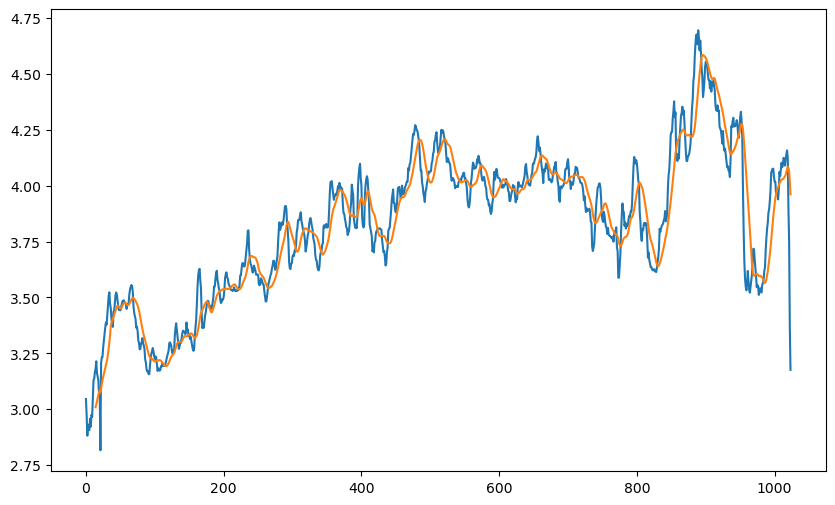

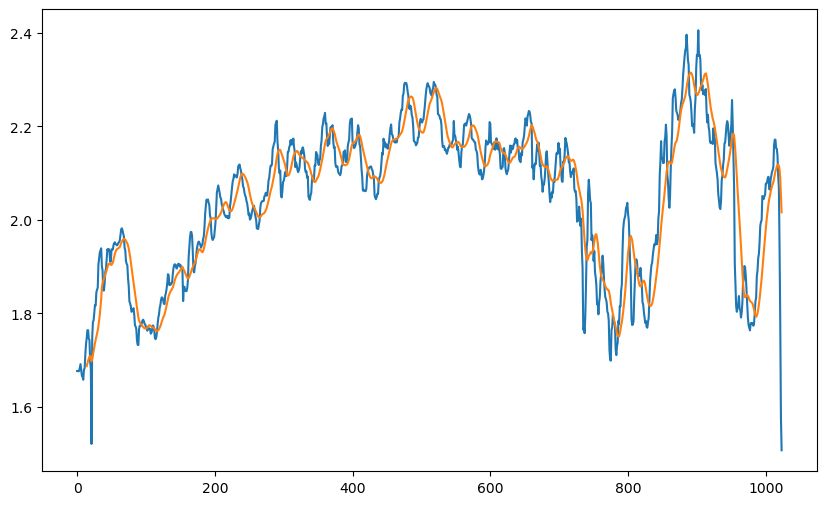

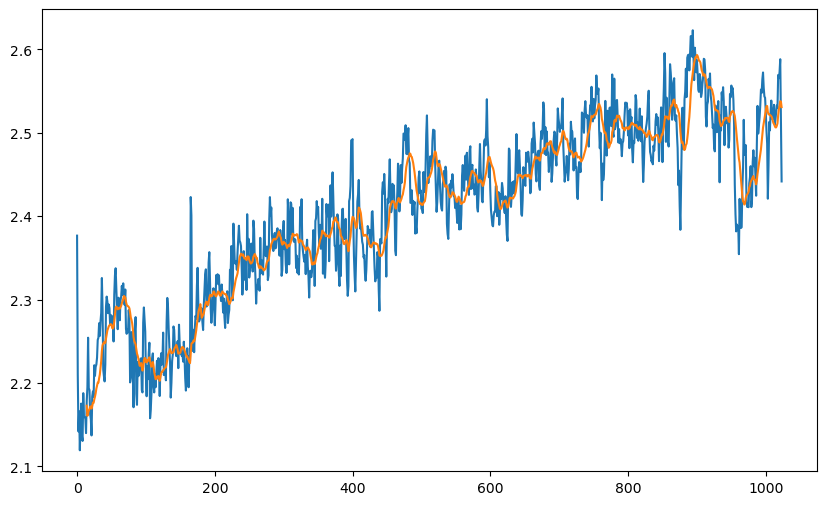

In [17]:
plt.plot(df3['Vp'])
dfx1 = df3['Vp'].rolling(window =15).mean().plot(figsize=(10,6))
plt.show()

plt.plot(df3['Vs'])
dfx1 = df3['Vs'].rolling(window =15).mean().plot(figsize=(10,6))
plt.show()

plt.plot(df3['DEN'])
dfx1 = df3['DEN'].rolling(window =15).mean().plot(figsize=(10,6))
plt.show()

dataF = df3.rolling(window =15).mean()

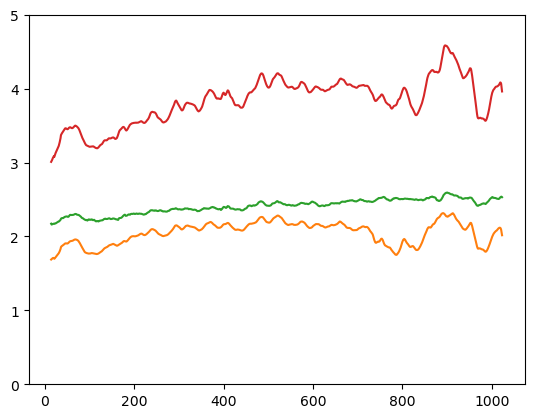

In [18]:
plt.plot(dataF)
plt.ylim(0,5)
plt.show()
dataF.to_excel('CleanedFeatureSelectedFiltered.xlsx', index=False)

## Task 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1024 non-null   int64  
 1   Vs          1024 non-null   float64
 2   DEN         1024 non-null   float64
 3   Vp          1024 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 32.1 KB
[1.6821362] 0.38667161251488125
Mean Squared Error: 0.03298301121644875
Root Mean Squared Error: 0.18161225513838197
R-Square: 0.6964251039313529


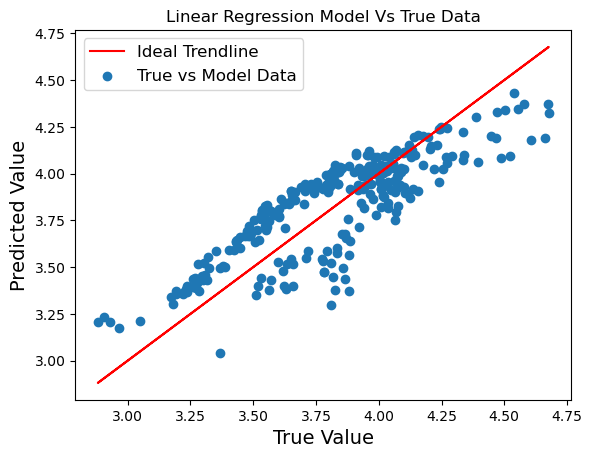

In [25]:
df4 = pd.read_excel('FinalCleanedSelected.xlsx')

df4.info()
X = df4[['Vs']]
X_multi = df4[['Vs', 'DEN']]

y = df4['Vp']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
regression = LinearRegression()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test)
print(regression.coef_, regression.intercept_)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:',rmse)
print('R-Square:',r2 )
plt.plot(y_test,y_test, '-r')
plt.scatter(y_test, y_pred)

plt.title('Linear Regression Model Vs True Data')
plt.xlabel('True Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.legend(['Ideal Trendline', 'True vs Model Data'], loc='upper left', fontsize=12)
plt.show()